In [0]:
# {0: 'Camera',
#  1: 'Selection',
#  2: 'Ability',
#  3: 'Right Click',
#  4: 'SetControlGroup',
#  5: 'GetControlGroup',
#  6: 'AddToControlGroup',
#  7: 'ControlGroup'}

In [0]:
# event
##1) Ability : 생산, 공격 등 선수의 주요 행동

##2) AddToControlGroup : 부대에 추가

##3) Camera : 시점 선택

##4) ControlGroup : 부대 행동

##5) GetControlGroup : 부대 불러오기

##6) Right Click : 마우스 우클릭

##7) Selection : 객체 선택

##8) SetControlGroup : 부대 지정


# event unique values : ['Camera' 'Selection' 'Ability' 'Right Click' 'SetControlGroup'
#  'GetControlGroup' 'AddToControlGroup' 'ControlGroup']
# species unique values : ['T' 'P' 'Z']

# 데이터 준비 
- event 행동종류 count와 종족에 대한 데이터
- P0 :player , P1: player , delta : 플레이어 간의 행동종류 차이 값  
-  게임 버전은 3.16.1 이며 확장팩은 공허의 유산 (3.16.1은 2017.08 패치)


In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_star/data')

In [3]:
import pandas as pd

train = pd.read_csv('xy_train.csv')
print(train.shape)
train.head()

(38872, 35)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection
0,0,0,0,0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45
1,1,1,1,1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177
2,2,2,2,2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86
3,3,3,3,3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171
4,4,4,4,4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64


In [4]:
train.loc[(train['p0_wm']=='False'),'p0_wm']=0
train.loc[(train['p1_wm']=='False'),'p1_wm']=0

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
train.loc[(train['p0_wm']=='True'),'p0_wm']=1
train.loc[(train['p1_wm']=='True'),'p1_wm']=1

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
train.loc[(train['p1_wm']=='True')]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection


In [0]:
train['p0_wm'] =  train['p0_wm'].apply(lambda x : int(x))
train['p1_wm'] =  train['p1_wm'].apply(lambda x : int(x))

In [0]:
train['delta_wm'] = train['p0_wm']-train['p1_wm']

In [0]:
train['delta_p_selection']= train['P0_p_selection'] - train['P1_p_selection']

In [10]:
train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,delta_wm,delta_p_selection
0,0,0,0,0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45,3,-8
1,1,1,1,1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177,5,63
2,2,2,2,2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86,-4,-120
3,3,3,3,3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171,-17,27
4,4,4,4,4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64,1,-54


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38872 entries, 0 to 38871
Data columns (total 37 columns):
Unnamed: 0                 38872 non-null int64
Unnamed: 0.1               38872 non-null int64
Unnamed: 0.1.1             38872 non-null int64
game_id                    38872 non-null float64
P0_species                 38872 non-null float64
P0_Camera                  38872 non-null float64
P0_Selection               38872 non-null float64
P0_Ability                 38872 non-null float64
P0_Right Click             38872 non-null float64
P0_SetControlGroup         38872 non-null float64
P0_GetControlGroup         38872 non-null float64
P0_AddToControlGroup       38872 non-null float64
P0_ControlGroup            38872 non-null float64
P1_species                 38872 non-null float64
P1_Camera                  38872 non-null float64
P1_Selection               38872 non-null float64
P1_Ability                 38872 non-null float64
P1_Right Click             38872 non-null float

In [12]:
test = pd.read_csv('x_test.csv')
print(test.shape)
test.head()

(16787, 36)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,p0_wm,p1_wm,delta_wm,P0_p_selection,P1_p_selection,delta_p_selection
0,0,0,0,38872.0,0.0,232.0,52.0,31.0,1.0,5.0,241.0,9.0,0.0,0.0,467.0,41.0,38.0,4.0,0.0,122.0,43.0,0.0,-235.0,11.0,-7.0,-3.0,5.0,119.0,-34.0,0.0,12,11,1,48,38,10
1,1,1,1,38873.0,1.0,200.0,114.0,34.0,0.0,0.0,51.0,18.0,4.0,0.0,146.0,19.0,28.0,1.0,5.0,68.0,122.0,0.0,54.0,95.0,6.0,-1.0,-5.0,-17.0,-104.0,4.0,3,7,-4,107,18,89
2,2,2,2,38874.0,2.0,245.0,42.0,33.0,0.0,7.0,79.0,63.0,0.0,2.0,220.0,36.0,29.0,0.0,5.0,108.0,426.0,0.0,25.0,6.0,4.0,0.0,2.0,-29.0,-363.0,0.0,10,4,6,41,34,7
3,3,3,3,38875.0,2.0,515.0,123.0,95.0,8.0,9.0,218.0,255.0,0.0,0.0,357.0,99.0,58.0,1.0,2.0,322.0,24.0,0.0,158.0,24.0,37.0,7.0,7.0,-104.0,231.0,0.0,10,12,-2,114,88,26
4,4,4,4,38876.0,1.0,129.0,25.0,7.0,2.0,2.0,30.0,387.0,0.0,1.0,161.0,35.0,8.0,0.0,1.0,7.0,1.0,0.0,-32.0,-10.0,-1.0,2.0,1.0,23.0,386.0,0.0,1,5,-4,25,35,-10


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 36 columns):
Unnamed: 0                 16787 non-null int64
Unnamed: 0.1               16787 non-null int64
Unnamed: 0.1.1             16787 non-null int64
game_id                    16787 non-null float64
P0_species                 16787 non-null float64
P0_Camera                  16787 non-null float64
P0_Selection               16787 non-null float64
P0_Ability                 16787 non-null float64
P0_Right Click             16787 non-null float64
P0_SetControlGroup         16787 non-null float64
P0_GetControlGroup         16787 non-null float64
P0_AddToControlGroup       16787 non-null float64
P0_ControlGroup            16787 non-null float64
P1_species                 16787 non-null float64
P1_Camera                  16787 non-null float64
P1_Selection               16787 non-null float64
P1_Ability                 16787 non-null float64
P1_Right Click             16787 non-null float

# Data preprocessing

- 종족컬럼 나누기

In [0]:
a= pd.get_dummies(train['P0_species'],prefix='P0_sp')

In [0]:
train = pd.merge(train,a,left_index=True,right_index=True)

In [0]:
a= pd.get_dummies(train['P1_species'],prefix='P1_sp')

In [0]:
train = pd.merge(train,a,left_index=True,right_index=True)

In [0]:
print(train.shape)
train.head()

(38872, 43)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,delta_wm,delta_p_selection,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0
0,0,0,0,0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45,3,-8,1,0,0,1,0,0
1,1,1,1,1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177,5,63,0,1,0,1,0,0
2,2,2,2,2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86,-4,-120,0,1,0,0,0,1
3,3,3,3,3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171,-17,27,1,0,0,0,1,0
4,4,4,4,4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64,1,-54,1,0,0,0,0,1


In [0]:
t_a = pd.get_dummies(test['P0_species'],prefix='P0_sp')

In [0]:
test = pd.merge(test,t_a,right_index= True,left_index=True)

In [0]:
t_a = pd.get_dummies(test['P1_species'],prefix='P1_sp')

In [0]:
test = pd.merge(test,t_a,right_index= True,left_index=True)

In [0]:
print(test.shape)
test.head()

(16787, 42)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,p0_wm,p1_wm,delta_wm,P0_p_selection,P1_p_selection,delta_p_selection,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0
0,0,0,0,38872.0,0.0,232.0,52.0,31.0,1.0,5.0,241.0,9.0,0.0,0.0,467.0,41.0,38.0,4.0,0.0,122.0,43.0,0.0,-235.0,11.0,-7.0,-3.0,5.0,119.0,-34.0,0.0,12,11,1,48,38,10,1,0,0,1,0,0
1,1,1,1,38873.0,1.0,200.0,114.0,34.0,0.0,0.0,51.0,18.0,4.0,0.0,146.0,19.0,28.0,1.0,5.0,68.0,122.0,0.0,54.0,95.0,6.0,-1.0,-5.0,-17.0,-104.0,4.0,3,7,-4,107,18,89,0,1,0,1,0,0
2,2,2,2,38874.0,2.0,245.0,42.0,33.0,0.0,7.0,79.0,63.0,0.0,2.0,220.0,36.0,29.0,0.0,5.0,108.0,426.0,0.0,25.0,6.0,4.0,0.0,2.0,-29.0,-363.0,0.0,10,4,6,41,34,7,0,0,1,0,0,1
3,3,3,3,38875.0,2.0,515.0,123.0,95.0,8.0,9.0,218.0,255.0,0.0,0.0,357.0,99.0,58.0,1.0,2.0,322.0,24.0,0.0,158.0,24.0,37.0,7.0,7.0,-104.0,231.0,0.0,10,12,-2,114,88,26,0,0,1,1,0,0
4,4,4,4,38876.0,1.0,129.0,25.0,7.0,2.0,2.0,30.0,387.0,0.0,1.0,161.0,35.0,8.0,0.0,1.0,7.0,1.0,0.0,-32.0,-10.0,-1.0,2.0,1.0,23.0,386.0,0.0,1,5,-4,25,35,-10,0,1,0,0,1,0


# Model

In [14]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'game_id', 'P0_species',
       'P0_Camera', 'P0_Selection', 'P0_Ability', 'P0_Right Click',
       'P0_SetControlGroup', 'P0_GetControlGroup', 'P0_AddToControlGroup',
       'P0_ControlGroup', 'P1_species', 'P1_Camera', 'P1_Selection',
       'P1_Ability', 'P1_Right Click', 'P1_SetControlGroup',
       'P1_GetControlGroup', 'P1_AddToControlGroup', 'P1_ControlGroup',
       'delta_Camera', 'delta_Selection', 'delta_Ability', 'delta_Right Click',
       'delta_SetControlGroup', 'delta_GetControlGroup',
       'delta_AddToControlGroup', 'delta_ControlGroup', 'winner', 'p0_wm',
       'p1_wm', 'P1_p_selection', 'P0_p_selection', 'delta_wm',
       'delta_p_selection'],
      dtype='object')

In [0]:
feature = [  'P0_p_selection',
       'P0_Right Click', 'P0_SetControlGroup', 'P0_GetControlGroup',
       'P0_AddToControlGroup',   
       'P1_p_selection', 'P1_Right Click', 'P1_SetControlGroup',
       'P1_GetControlGroup', 'P1_AddToControlGroup',
        'delta_p_selection', 'delta_Right Click',
       'delta_SetControlGroup', 'delta_GetControlGroup',
       'delta_AddToControlGroup', 'P0_Ability','P1_Ability','delta_Ability']
       #'P1_sp_0.0', 'P1_sp_1.0', 'P1_sp_2.0', 'P0_sp_0.0', 'P0_sp_1.0',
      # 'P0_sp_2.0']
    #    'P0_species','P1_species']
    #    'p0_wm','p1_wm','delta_wm']

# feature = ['P0_Camera', 'P0_p_selection', 'P0_Ability',
#        'P0_Right Click', 'P0_SetControlGroup', 'P0_GetControlGroup',
#        'P0_AddToControlGroup', 'P0_ControlGroup',  'P1_Camera',
#        'P1_p_selection', 'P1_Right Click', 'P1_SetControlGroup', 'P1_Ability',
#        'P1_GetControlGroup', 'P1_AddToControlGroup', 'P1_ControlGroup','P0_species','P1_species','p0_wm','p1_wm']

x_train = train[feature]
y_train= train['winner']

x_test = test[feature]

In [0]:
from yellowbrick.classifier import ROCAUC

def lgb_cv(num_leaves, learning_rate, n_estimators, subsample, colsample_bytree, reg_alpha, reg_lambda,bagging_fraction, x_data=None, y_data=None, n_splits=5, output='score'):
    score = 0
    kf = KFold(n_splits=n_splits)
    models = []
    for train_index, valid_index in kf.split(x_data):
        x_train, y_train = x_data.iloc[train_index], y_data[train_index]
        x_valid, y_valid = x_data.iloc[valid_index], y_data[valid_index]
        
        model = lgb.LGBMClassifier(
            num_leaves = int(num_leaves), 
            learning_rate = learning_rate, 
            n_estimators = int(n_estimators), 
            subsample = np.clip(subsample, 0, 1), 
            colsample_bytree = np.clip(colsample_bytree, 0, 1), 
            reg_alpha = reg_alpha, 
            reg_lambda = reg_lambda,
            bagging_fraction = bagging_fraction,
            objective = 'binary'
        )
        
        model.fit(x_train, y_train)
        models.append(model)
        
        pred = model.predict_proba(x_valid)[:, 1]
        true = y_valid
        score += roc_auc_score(true, pred)/n_splits

        


    if output == 'score':
        return score
    if output == 'model':
        return models

In [17]:
pip install bayesian-optimization

In [30]:
import pandas as pd                         # 데이터 분석 라이브러리
import numpy as np                          # 계산 라이브러리
from tqdm import tqdm                       # 진행바
from sklearn.metrics import roc_auc_score   # AUC 스코어 계산
from sklearn.model_selection import KFold   # K-fold CV    
from bayes_opt import BayesianOptimization  # 베이지안 최적화 라이브러리  
from functools import partial               # 함수 변수 고정
import lightgbm as lgb                      # LightGBM 라이브러리
import warnings                             
warnings.filterwarnings("ignore")  


func_fixed = partial(lgb_cv, x_data=x_train, y_data=y_train, n_splits=10, output='score') 
# 베이지안 최적화 범위 설정
lgbBO = BayesianOptimization(
    func_fixed, 
    {
        'num_leaves': (16, 1024),        # num_leaves,       범위(16~1024)
        'learning_rate': (0.0005, 0.1),  # learning_rate,    범위(0.0001~0.1)
        'n_estimators': (16, 1024),      # n_estimators,     범위(16~1024)
        'subsample': (0, 1),             # subsample,        범위(0~1)
        'colsample_bytree': (0, 1),      # colsample_bytree, 범위(0~1)
        'reg_alpha': (0, 10),            # reg_alpha,        범위(0~10)
        'reg_lambda': (0, 50),           # reg_lambda,       범위(0~50)
        'bagging_fraction':(0,1),
        
    }, 
    random_state=2019                    # 시드 고정
)
lgbBO.maximize(init_points=5, n_iter=30) 

|   iter    |  target   | baggin... | colsam... | learni... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.6287   |  0.9035   |  0.3931   |  0.06259  |  659.0    |  903.5    |  2.992    |  35.11    |  0.9032   |
|  2        |  0.6418   |  0.8814   |  0.4057   |  0.04552  |  285.2    |  180.2    |  8.892    |  7.424    |  0.9847   |
|  3        |  0.6358   |  0.03236  |  0.5154   |  0.02051  |  909.1    |  533.7    |  5.783    |  14.96    |  0.8372   |
|  4        |  0.6248   |  0.5266   |  0.1048   |  0.02817  |  62.97    |  529.1    |  4.724    |  45.22    |  0.9435   |
|  5        |  0.6201   |  0.7034   |  0.8463   |  0.09284  |  841.9    |  867.9    |  7.915    |  8.55     |  0.29     |
|  6        |  0.6389   |  0.3436   |  0.4045   |  0.001516 |  996.7    |  21.22    |  2.335    |  37.87    |  0.04869  |
|  7        |  0.6441   

In [0]:
params = lgbBO.max['params']
models = lgb_cv(
    params['num_leaves'], 
    params['learning_rate'], 
    params['n_estimators'], 
    params['subsample'], 
    params['colsample_bytree'], 
    params['reg_alpha'], 
    params['reg_lambda'], 
    params['bagging_fraction'],
    x_data=x_train, y_data=y_train, n_splits=15, output='score')

In [37]:
models

0.6491056661340847

In [0]:
preds = []
for model in models:
    pred = model.predict_proba(x_test)[:, 1]
    preds.append(pred)
pred = np.mean(preds, axis=0)


-----

In [0]:
# from sklearn.ensemble import RandomForestClassifier 

# rfc = RandomForestClassifier(n_estimators=500,max_depth=10,n_jobs=-1)

In [0]:
# pred = lr.predict_proba(x_test)

----

In [0]:
submission = pd.read_csv('../sample_submission.csv', index_col=0)

In [0]:
submission['winner'] = pred


In [0]:
submission.to_csv('../submissions/report16_lgbm_k15_iter30_bagging(0,1).csv')

In [25]:
submission

,winner
game_id,
38872,0.546285
38873,0.458262
38874,0.380303
38875,0.283409
38876,0.471396
...,...
55654,0.664407
55655,0.497838
55656,0.670922


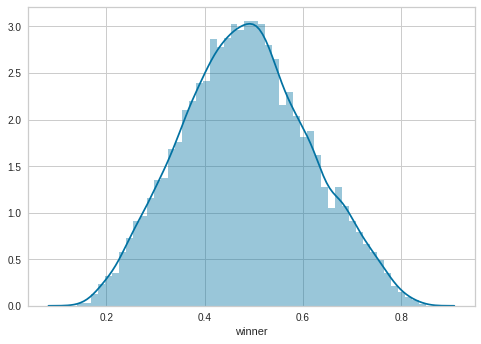

In [35]:
import seaborn as sns
sns.distplot(submission.winner)



validation score
- delta col 제거하고 일꾼 컬럼 추가 시,iter 10 , k_fold 15: 0.6508
- ability 제거하고 일꾼 컬럼 추가 시, iter 9 , k_fold 15: 0.632
- ability 제거 안하고 위와 동일 , iter 10 , k_fold 15: 0.656